In [5]:
import os
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
src_path = os.path.abspath(join("..", "language-modeling"))
%cd $src_path

/media/pips/Data/Projects/NLU-UniTN-2022/project/language-modeling


In [7]:
CSV_PATH = join("results", "csv")
NAMES = os.listdir(CSV_PATH)
EXPERIMENTS = [join(CSV_PATH, exp) for exp in NAMES]

In [8]:
for i, n in enumerate(NAMES):
    print(f"{i}: {n}")

0: baseline.csv
1: baseline_dropout.csv
2: baseline_dropout_adam.csv
3: merity_ad.csv
4: merity_ad_nohh.csv
5: merity_ad_nohh_1024.csv
6: merity_ad_nohh_1024_adam.csv
7: merity_ad_nohh_1024_tbptt.csv
8: merity_ad_nohh_adam.csv
9: merity_ad_nohh_tbptt.csv
10: merity_base.csv
11: merity_ed.csv
12: merity_eld.csv
13: merity_ld.csv
14: merity_wd.csv
15: merity_wd_nohh.csv
16: merity_wd_nolstm.csv


In [9]:
def plot_loss_ppl(exp_idx: int):
    df = pd.read_csv(EXPERIMENTS[exp_idx])

    train_loss = df[df.metric == "Loss/Train"].value.values
    train_ppl= df[df.metric == "Perplexity/Train"].value.values
    val_loss = df[df.metric == "Loss/Valid"].value.values[1:]
    val_ppl= df[df.metric == "Perplexity/Valid"].value.values[1:]

    print(f"Train last step perplexity: {train_ppl[-1]:.2f}")
    print(f"Validation last step perplexity: {val_ppl[-1]:.2f}")

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(NAMES[exp_idx].split(".")[0])
    axs[0].plot(train_loss, label='Train')
    axs[0].plot(val_loss, label='Validation')
    axs[1].plot(train_ppl, label='Train')
    axs[1].plot(val_ppl, label='Validation')


    axs[0].set_ylabel('Loss')
    axs[1].set_ylabel('Perplexity')
    axs[1].set_ylim(bottom=0, top=200)

    axs[0].set_xlabel('Epoch')
    axs[1].set_xlabel('Epoch')
    axs[0].legend()
    axs[1].legend()

    plt.show()

# Baseline

Train last step perplexity: 25.69
Validation last step perplexity: 214.79


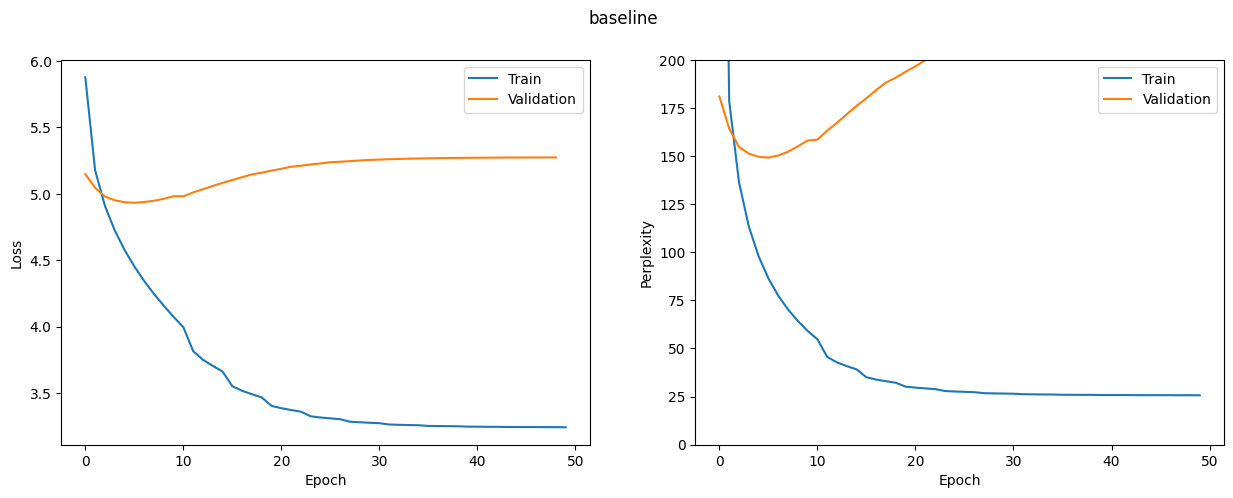

In [10]:
plot_loss_ppl(0)

Train last step perplexity: 48.42
Validation last step perplexity: 128.89


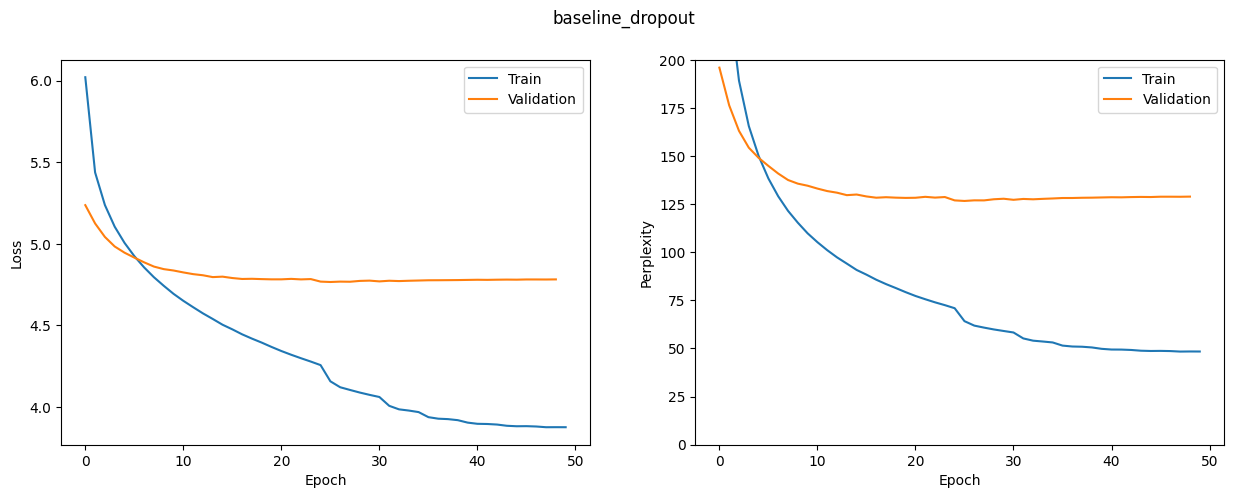

In [11]:
plot_loss_ppl(1)

Train last step perplexity: 47.55
Validation last step perplexity: 129.66


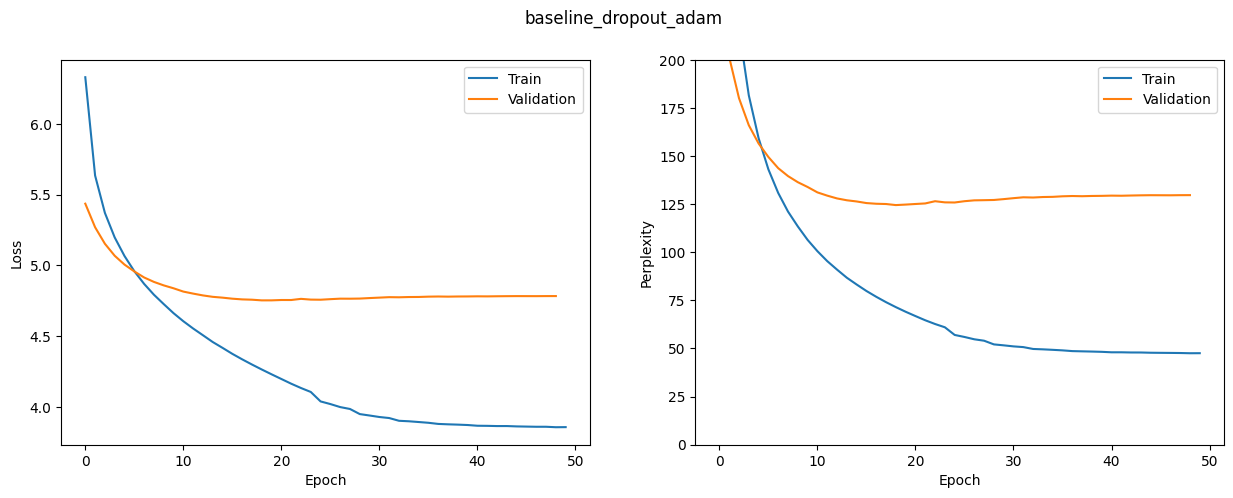

In [12]:
plot_loss_ppl(2)

# Merity

Train last step perplexity: 32.91
Validation last step perplexity: 135.53


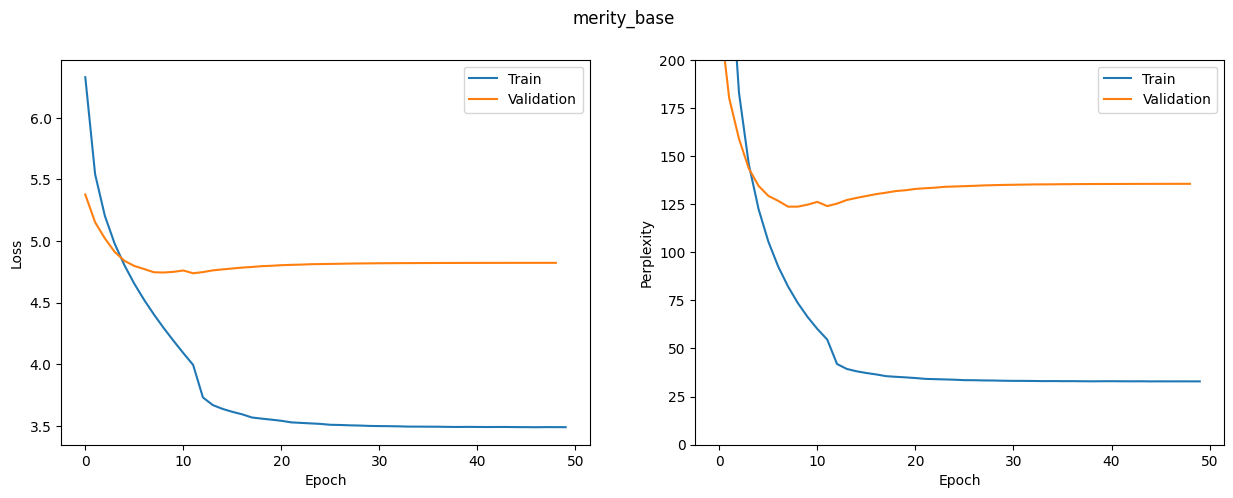

In [13]:
plot_loss_ppl(10)

Train last step perplexity: 44.09
Validation last step perplexity: 117.93


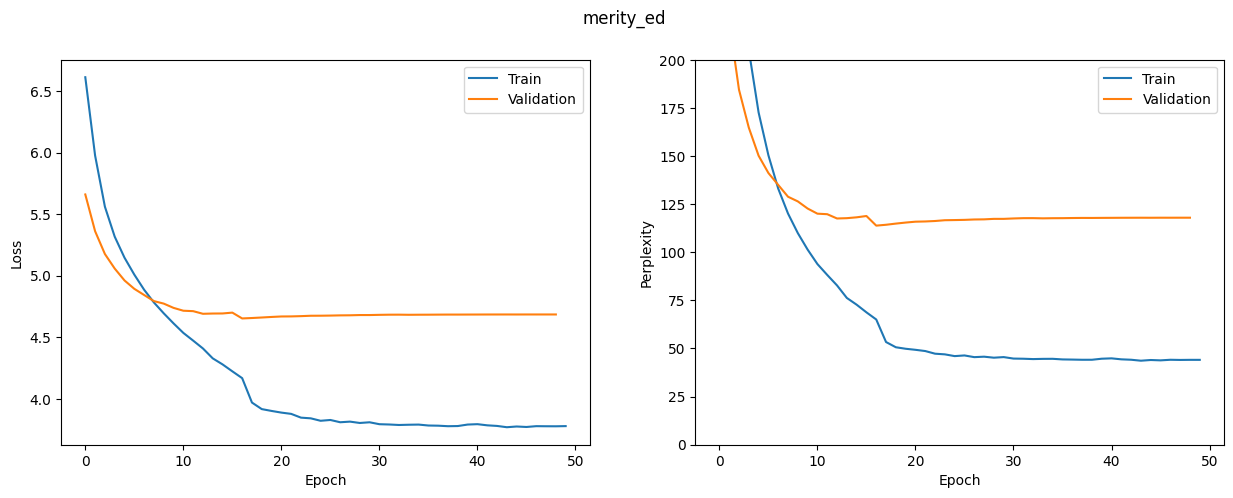

In [14]:
plot_loss_ppl(11)

Train last step perplexity: 36.07
Validation last step perplexity: 117.18


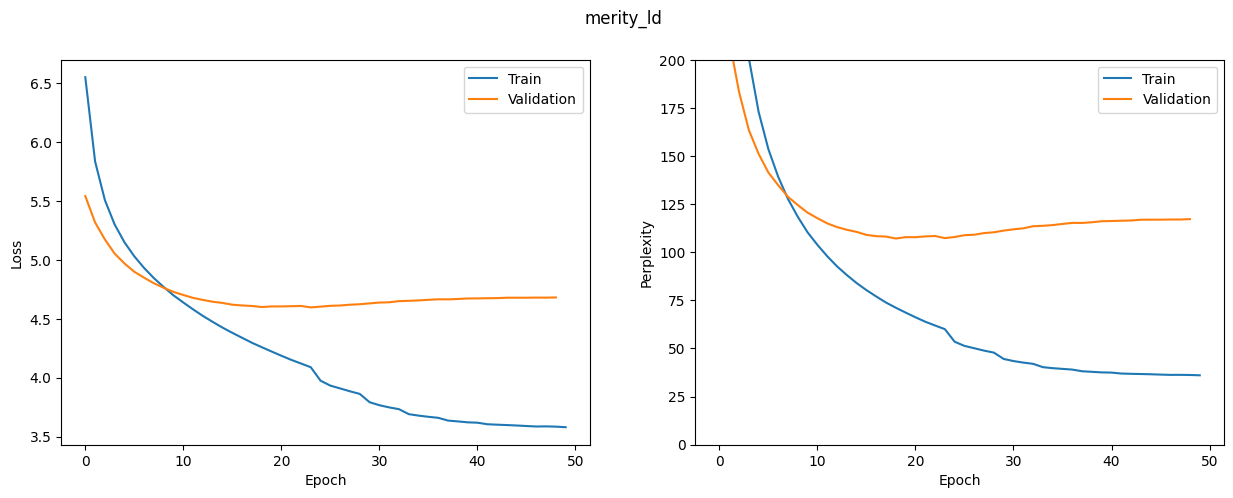

In [15]:
plot_loss_ppl(13)

Train last step perplexity: 48.57
Validation last step perplexity: 112.87


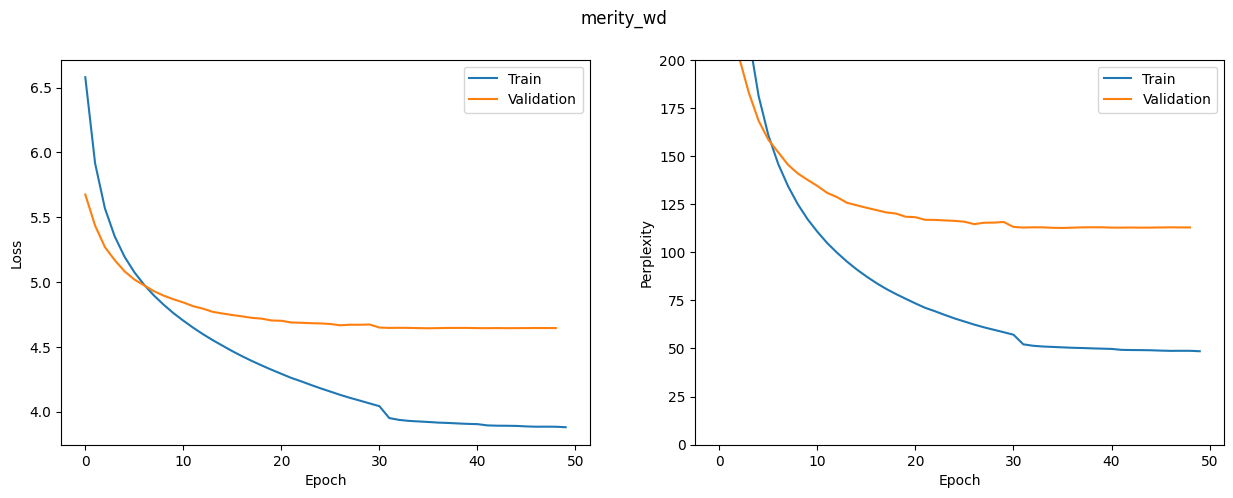

In [16]:
plot_loss_ppl(14)

Train last step perplexity: 45.67
Validation last step perplexity: 112.62


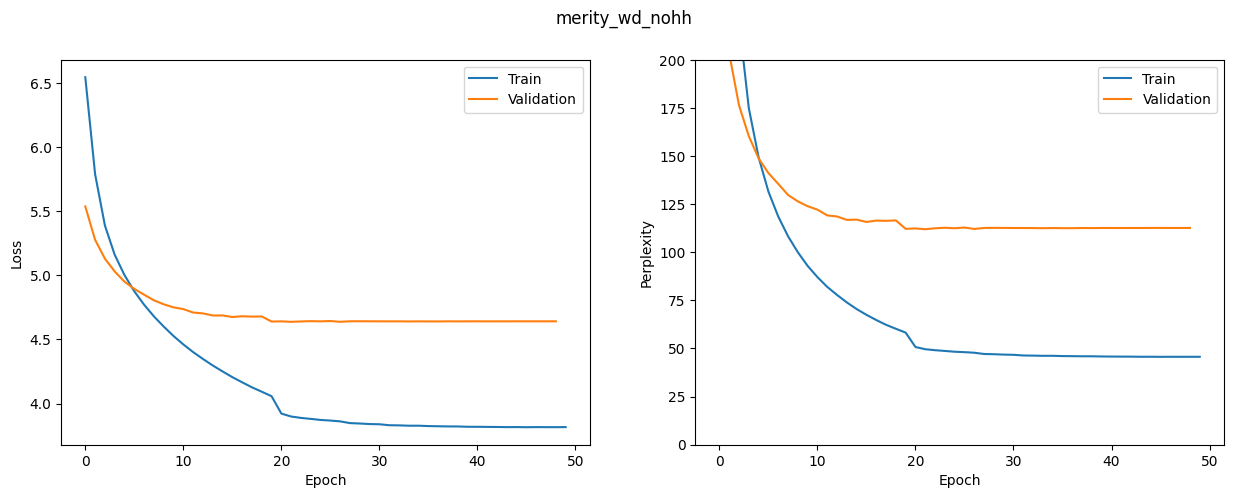

In [17]:
plot_loss_ppl(15)

Train last step perplexity: 42.52
Validation last step perplexity: 115.96


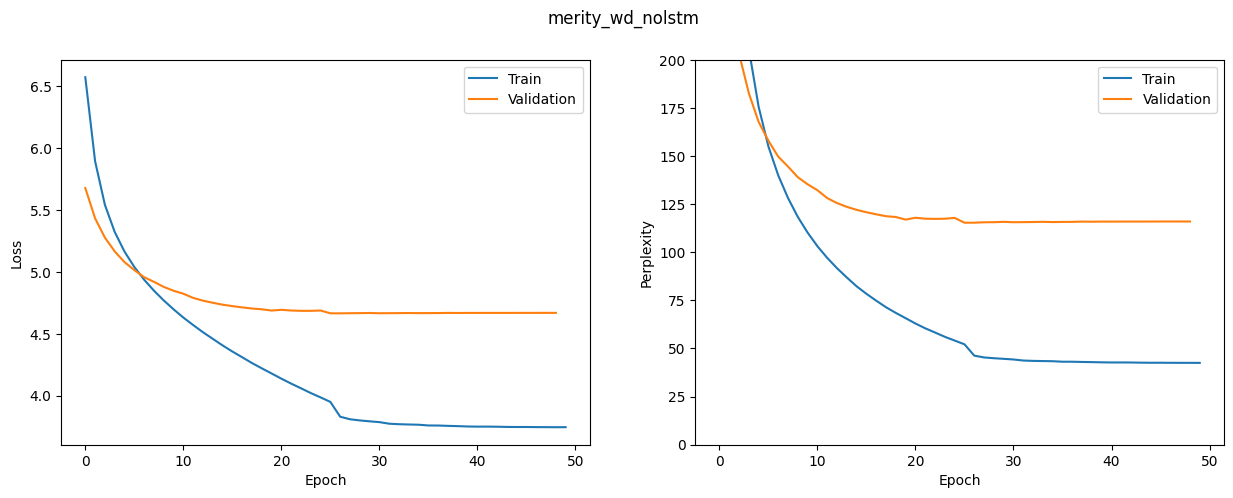

In [18]:
plot_loss_ppl(16)

Train last step perplexity: 55.23
Validation last step perplexity: 98.55


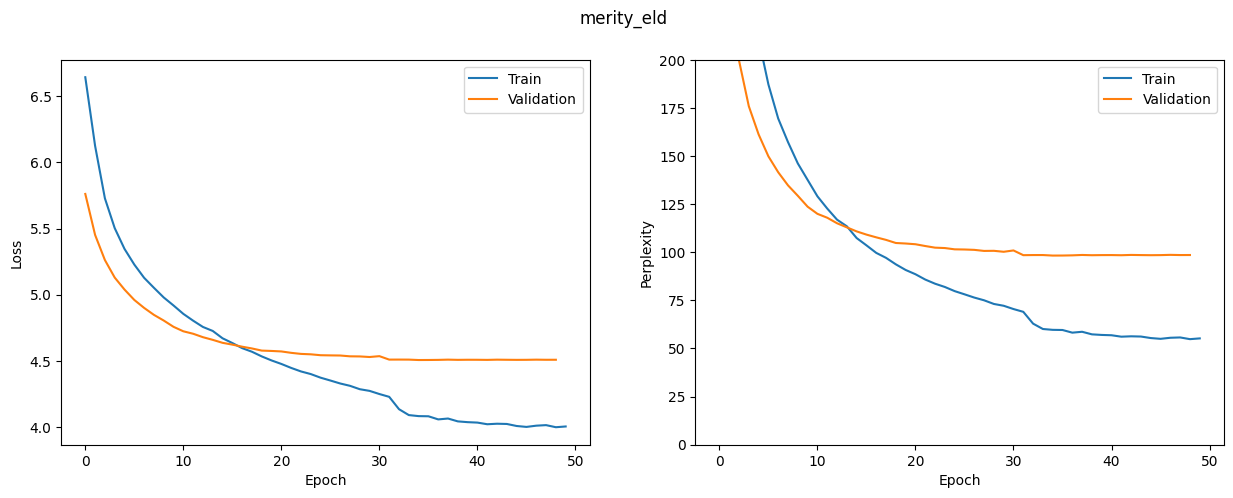

In [19]:
plot_loss_ppl(12)

Train last step perplexity: 93.21
Validation last step perplexity: 104.01


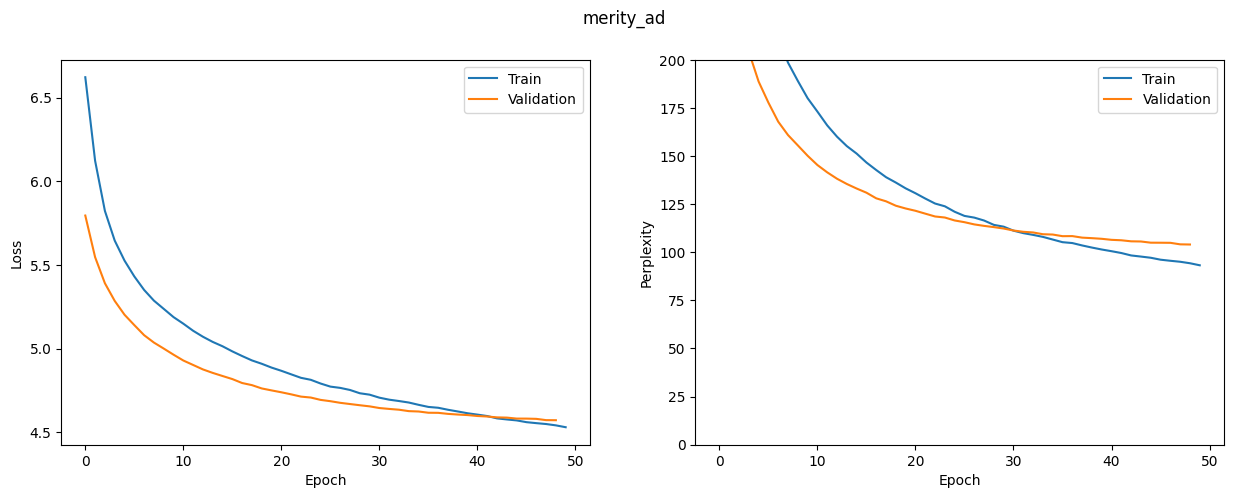

In [20]:
plot_loss_ppl(3)

Train last step perplexity: 85.19
Validation last step perplexity: 98.63


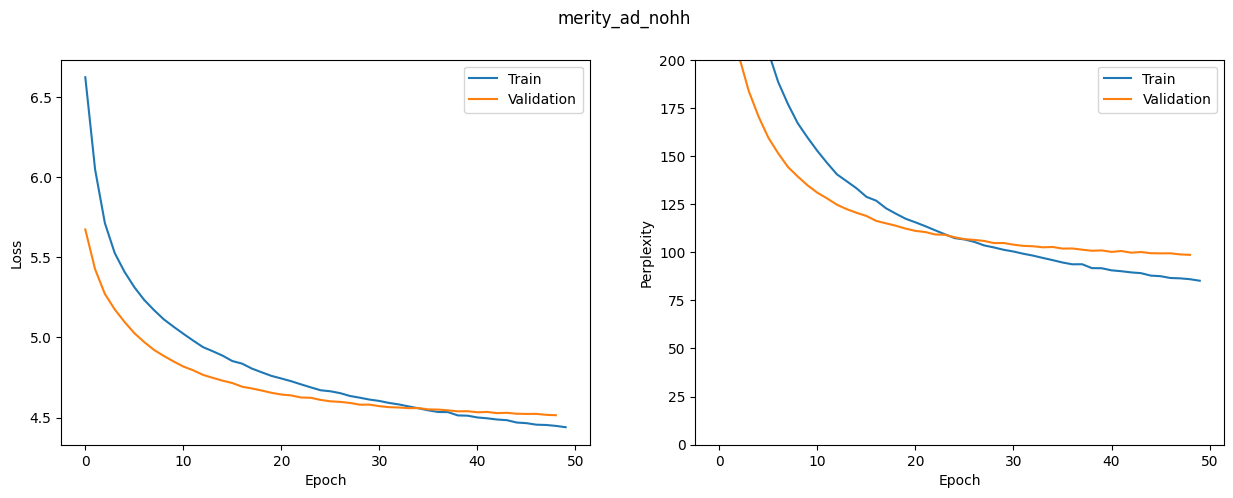

In [21]:
plot_loss_ppl(4)

Train last step perplexity: 85.26
Validation last step perplexity: 98.87


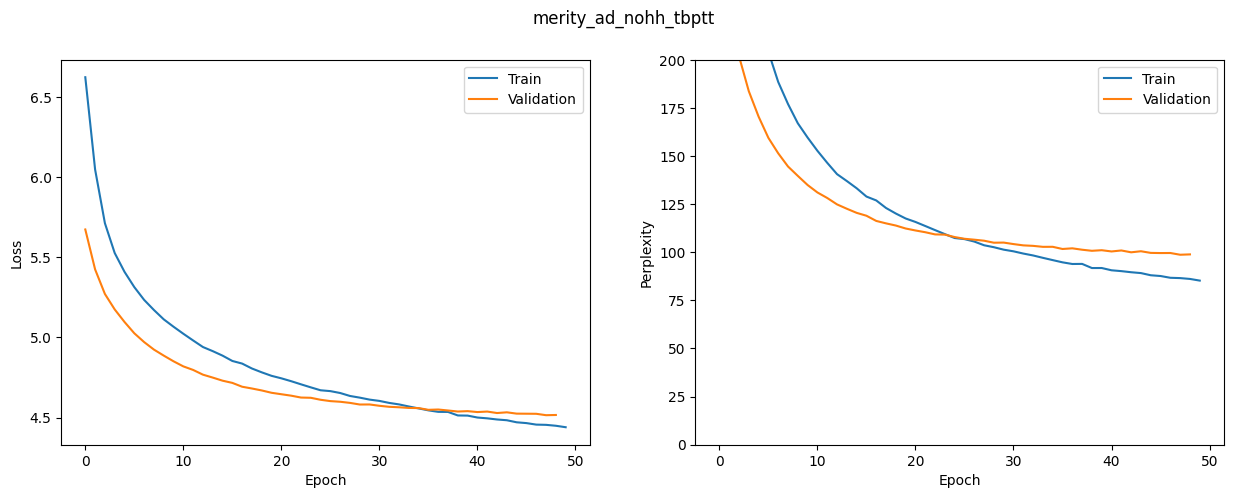

In [22]:
plot_loss_ppl(9)

Train last step perplexity: 80.03
Validation last step perplexity: 93.39


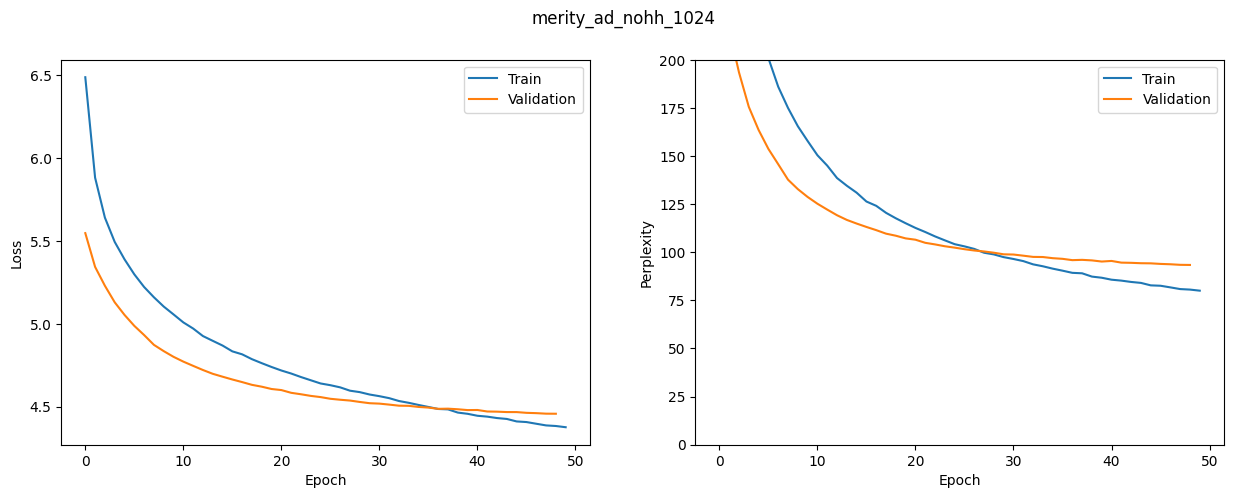

In [23]:
plot_loss_ppl(5)

Train last step perplexity: 90.85
Validation last step perplexity: 103.84


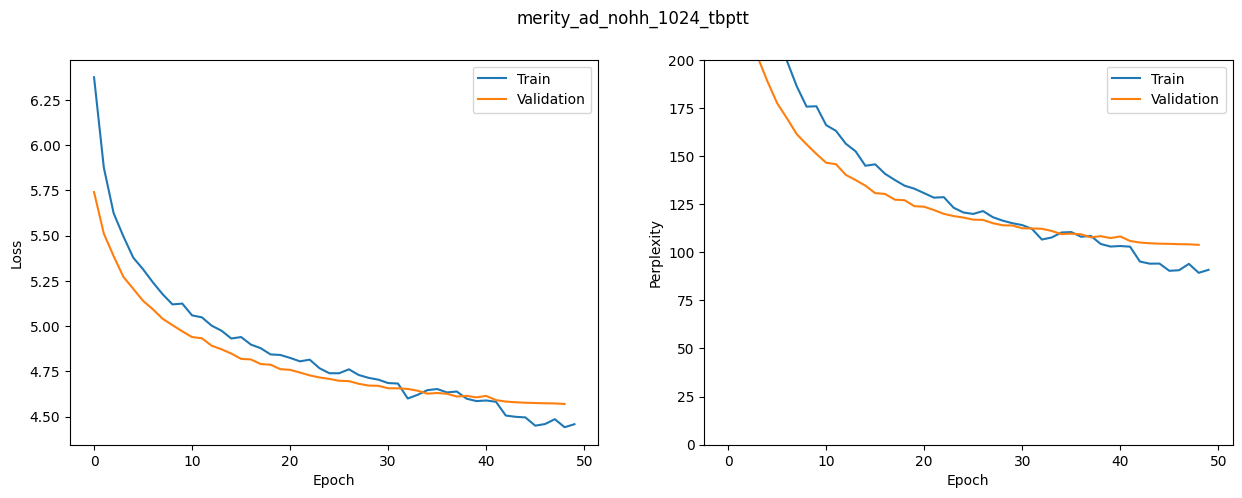

In [24]:
plot_loss_ppl(7)